w[0]: 0.393906  b: -0.031804


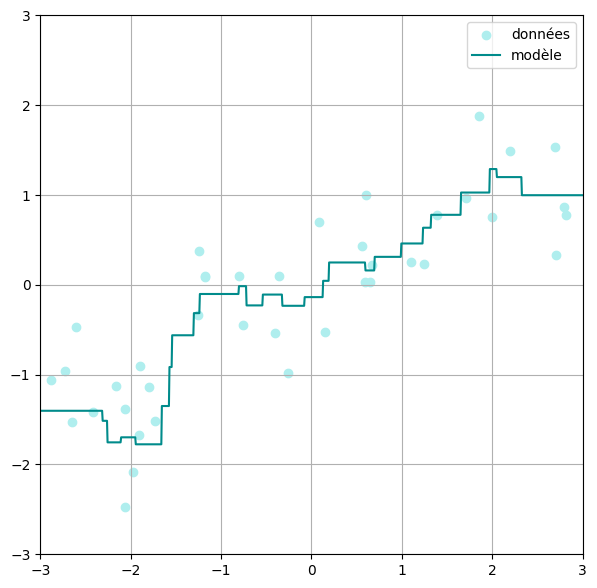

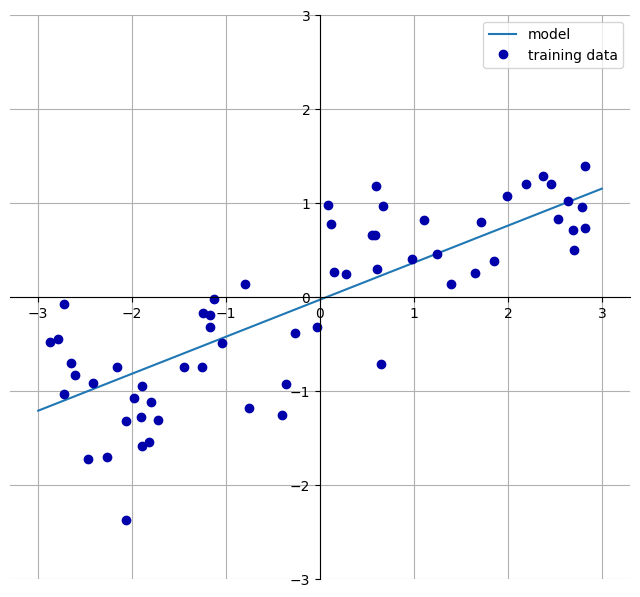

In [18]:
# Régression sur wave
%matplotlib inline

# nécessite mglearn : pip install mglearn
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

X,y = mglearn.datasets.make_wave(n_samples=40)
fig,axe = plt.subplots(figsize=(7,7))
line = np.linspace(-3,3,1000)
reshaped_line = line.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train,y_train)
prediction = regressor.predict(reshaped_line);

axe.scatter(X,y,c='paleturquoise',label="données",marker='o')
axe.plot(line,prediction,c='darkcyan',label="modèle")
axe.legend(loc="best")
axe.axis([-3.0,3.0,-3.0,3.0])
axe.grid(True)

mglearn.plots.plot_linear_regression_wave()

In [22]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
linearRegression = LinearRegression().fit(X_train,y_train)
print("Coefficients : {}\n".format(linearRegression.coef_))
print("Ordonnée à l'origine:  {}\n".format(linearRegression.intercept_))
print("Score entrainnement : {}, Test entrainnement : {}\n"
      .format(linearRegression.score(X_train,y_train),
             linearRegression.score(X_test,y_test)))

Coefficients : [0.39390555]

Ordonnée à l'origine:  -0.03180434302675976

Score entrainnement : 0.6700890315075756, Test entrainnement : 0.65933685968637



In [27]:
from mglearn.datasets import load_extended_boston
X,y = load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
linearRegression = LinearRegression().fit(X_train,y_train)
print("Score sur jeu d'entrainnement : {}, Score sur jeu de test : {}\n".
     format(linearRegression.score(X_train,y_train),
           linearRegression.score(X_test,y_test)))


Score sur jeu d'entrainnement : 0.9520519609032729, Score sur jeu de test : 0.6074721959666257



Rdige [alpha = default ] Score entrainnement : 0.885796658517094, Score test: 0.7527683481744754

